# Grundlagen

Beispiele aus https://programming-review.com/python/scipy-examples#basic-examples

## Kurve fitten



[2.86089513 1.50469476]


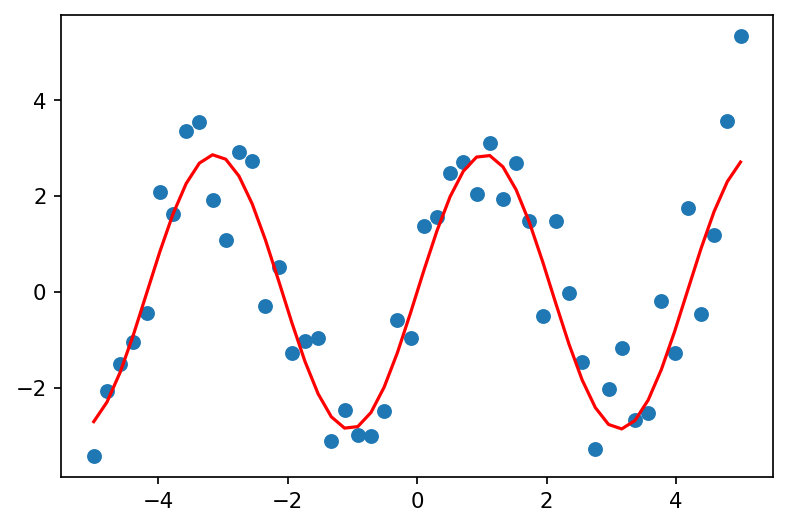

In [2]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
x_data = np.linspace(-5, 5, num=50)
y_data = 2.9 * np.sin(1.5 * x_data) + np.random.normal(size=50)

fig, ax = plt.subplots(dpi=153)

def test_func(x, a, b):
    return a * np.sin(b * x)

params, params_covariance = optimize.curve_fit(test_func, x_data, y_data, p0=[2, 2])
print(params)
ax.scatter(x_data,y_data)
ax.plot(x_data, test_func(x_data,params[0], params[1]), c='r')
plt.show()

## Interpolation

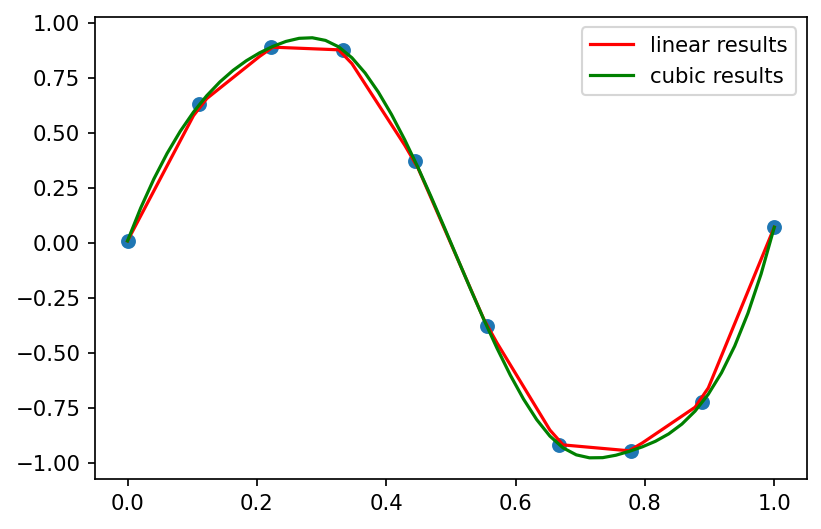

In [3]:
import matplotlib.pyplot as plt
measured_time = np.linspace(0, 1, 10)
noise = (np.random.random(10)*2 - 1) * 1e-1
measures = np.sin(2 * np.pi * measured_time) + noise
fig, ax = plt.subplots(dpi=153)
ax.scatter(measured_time, measures) # Blue dots

# Interpolation time
from scipy.interpolate import interp1d
interpolation_time = np.linspace(0, 1, 50)
linear_interp = interp1d(measured_time, measures)
linear_results = linear_interp(interpolation_time)
cubic_interp = interp1d(measured_time, measures, kind='cubic')
cubic_results = cubic_interp(interpolation_time)

ax.plot(interpolation_time, linear_results, c='r', label='linear results')
ax.plot(interpolation_time, cubic_results, c='g', label='cubic results')

ax.legend()
plt.show()

## Integrieren

aus https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html

$ \int_{0}^{1}ax^2+bx\,dx$

In [4]:
from scipy.integrate import quad
def integrand(x, a, b):
    return a*x**2 + b

a = 2
b = 1
I = quad(integrand, 0, 1, args=(a,b))
I

(1.6666666666666667, 1.8503717077085944e-14)

## Ableitung

aus https://docs.scipy.org/doc/scipy/reference/generated/scipy.misc.derivative.html
$$
f(x) = x^3 + x^2
$$

$$
f'(x) = 3x^2 +2x
$$

$$
f'(1) = 5
$$


In [5]:
from scipy.misc import derivative
def f(x):
    return x**3 + x**2
derivative(f, 1.0, dx=1e-6)

4.999999999921734